In [1]:
import openai
import pandas as pd
import requests
import json
import openpyxl

In [2]:
gen2 = pd.read_csv('Social+Learning+Experiment_2nd+gen_July+2,+2024_08.29.csv')
gen3 = pd.read_csv("Social+Learning+Experiment_3rd+gen_July+7,+2024_14.37.csv")
gen4 = pd.read_csv("Social+Learning+Experiment_4th+gen_July+12,+2024_18.09.csv")

In [10]:
def hey_chatGPT(answer_my_question, gpt4_API):
    url = "https://api.openai.com/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {gpt4_API}",
        "Content-Type": "application/json"
    }
    body = {
        "model": "gpt-4-1106-preview",
        "temperature": 0,
        "messages": [
            {"role": "user", "content": answer_my_question}
        ]
    }

    response = requests.post(url, headers=headers, data=json.dumps(body))

    try:
        response_json = response.json()
        return response_json['choices'][0]['message']['content'].strip()

    except KeyError:
        print("Unexpected response format:", response_json)
        return None

# Example usage
gpt4_API = ""
question = "What is the capital of France?"
answer = hey_chatGPT(question, gpt4_API)
print(answer)

The capital of France is Paris.


In [11]:
def process_text(text, gpt4_API):
    # Clean up text
    clean_text_prompt = (
        f"Determine if the following text, which can be either a sentence or a phrase, makes sense in English. "
        f"If the text does not make logical sense in the language, output NA. If the text does make sense, then correct any typos. "
        f"Please output ONLY the corrected version in English. Here is the text: {text}"
    )
    cleaned_text = hey_chatGPT(clean_text_prompt, gpt4_API)
    
    # Evaluate morality
    moral_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. The content is their reaction to different news events. "
        f"Please evaluate the extent of morality expressed in this text on a scale from 1-5 (1 = not at all moral, 3 = moderately moral, 5 = very moral). "
        f"Please note that you should only encode the degree of morality directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Morality: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {cleaned_text}"
    )
    morality = hey_chatGPT(moral_prompt, gpt4_API)
    
    # Evaluate emotion
    emotion_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the extent of emotion expressed in this text on a scale from 1-5 (1 = not at all emotional, 3 = moderately emotional, 5 = very emotional). "
        f"Please note that you should only encode the degree of emotion directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Emotion: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {cleaned_text}"
    )
    emotion = hey_chatGPT(emotion_prompt, gpt4_API)
    
    # Evaluate intergroup 
    intergroup_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the extent of intergroup expressed in this text on a scale from 1-5 (1 = not at all intergroup, 3 = moderately intergroup, 5 = very intergroup). "
        f"Please note that you should only encode the degree of intergroup directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Intergroup: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {cleaned_text}"
    )
    intergroup = hey_chatGPT(intergroup_prompt, gpt4_API)
    
    valence_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the valence of this text on a scale from 1 to 5 (1 = very negative, 3 = neutral, 5 = very positive). "
        f"Please note that you should only encode the degree of valence directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Valence: SCORE "
        f"SCORE should be a number between 1 and 5. Here is the text: {cleaned_text}"
    )
    valence = hey_chatGPT(valence_prompt, gpt4_API)
    
    return cleaned_text, morality, emotion, intergroup, valence

In [24]:
# Remove the people who quit
data = gen4[gen4['Instruction'] == "Agree and start"]

# Data slim
data_slim = data[['ResponseId', 'non-political post 1', 'political post 1', 'non-political post 2', 'political post 2']]

# Reshape the data from wide to long format
data_slim = data_slim.melt(id_vars='ResponseId', var_name='post_type', value_name='value')

# Display the 'value' column
print(data_slim['value'])


0      my heart goes out to those affected by the tor...
1      So sad and tragic about what happened in Tulsa...
2      Natural disasters are terrifying, especially c...
3      idc about what happened in kentucky or anywher...
4      My condolences go out to all of the lives lost...
                             ...                        
199    As a female I am disappointed that we seem to ...
200    A win today for the unborn! We must continue t...
201    The right to bodily autonomy is one of our mos...
202    Unfortunately America has lost another battle ...
203    It is horrible that the conservatives in Ameri...
Name: value, Length: 204, dtype: object


In [25]:
data.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'consent', 'Instruction',
       'Q39_First Click', 'Q39_Last Click', 'Q39_Page Submit',
       'Q39_Click Count', 'non-political post 1', 'Q20_1', 'Q23_1', 'Q25_1',
       'Q43_First Click', 'Q43_Last Click', 'Q43_Page Submit',
       'Q43_Click Count', 'non-political post 2', 'Q26_1', 'Q28_1', 'Q30_1',
       'Q41_First Click', 'Q41_Last Click', 'Q41_Page Submit',
       'Q41_Click Count', 'political post 1', 'Q34_1', 'Q33_1', 'Q31_1',
       'Q42_First Click', 'Q42_Last Click', 'Q42_Page Submit',
       'Q42_Click Count', 'political post 2', 'Q38_1', 'Q37_1', 'Q35_1', 'age',
       'gender', 'ses', 'social_ideology', 'econ_ideology', 'partisanship1',
       'partisa

In [26]:
data_slim = data[['ResponseId', 'Q39_Page Submit', 'non-political post 1', 'Q20_1', 'Q23_1', 'Q25_1',
                   'Q43_Page Submit','non-political post 2','Q26_1', 'Q28_1', 'Q30_1',
                   'Q41_Page Submit', 'political post 1', 'Q34_1', 'Q33_1', 'Q31_1',
                    'Q42_Page Submit','political post 2', 'Q38_1', 'Q37_1', 'Q35_1',
                    'age', 'gender', 'ses', 'social_ideology','econ_ideology', 'partisanship1', 'partisanship1_4_TEXT','partisanship2', 'partisanship3', 'partisanship4_1',
                    'selectedTexts_nonpoli_1', 'selectedTexts_nonpoli_2','selectedTexts_poli_1', 'selectedTexts_poli_2']]


In [28]:
for post_type in ['non-political post 1', 'political post 1', 'non-political post 2', 'political post 2']:
    data_slim[[f'{post_type}_cleaned', f'{post_type}_morality', f'{post_type}_emotion', f'{post_type}_intergroup', f'{post_type}_valence']] = data_slim[post_type].apply(lambda x: pd.Series(process_text(x, gpt4_API)))

C:\Users\kkwit\AppData\Local\Temp\ipykernel_11104\755560076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slim[[f'{post_type}_cleaned', f'{post_type}_morality', f'{post_type}_emotion', f'{post_type}_intergroup', f'{post_type}_valence']] = data_slim[post_type].apply(lambda x: pd.Series(process_text(x, gpt4_API)))
C:\Users\kkwit\AppData\Local\Temp\ipykernel_11104\755560076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slim[[f'{post_type}_cleaned', f'{post_type}_morality', f'{post_type}_e

Unexpected response format: {'error': {'code': 524, 'message': 'Gateway timeout.', 'param': None, 'type': 'cf_gateway_timeout'}}


C:\Users\kkwit\AppData\Local\Temp\ipykernel_11104\755560076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slim[[f'{post_type}_cleaned', f'{post_type}_morality', f'{post_type}_emotion', f'{post_type}_intergroup', f'{post_type}_valence']] = data_slim[post_type].apply(lambda x: pd.Series(process_text(x, gpt4_API)))
C:\Users\kkwit\AppData\Local\Temp\ipykernel_11104\755560076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_slim[[f'{post_type}_cleaned', f'{post_type}_morality', f'{post_type}_e

In [29]:
# Drop rows where any cleaned text is 'NA'
cleaned_columns = [f'{post_type}_cleaned' for post_type in ['non-political post 1', 'political post 1', 'non-political post 2', 'political post 2']]
df = data_slim.dropna(subset=cleaned_columns)

In [30]:
df.reset_index(inplace=True)

In [31]:
df.head()

,index,ResponseId,Q39_Page Submit,non-political post 1,Q20_1,Q23_1,Q25_1,Q43_Page Submit,non-political post 2,Q26_1,...,non-political post 2_cleaned,non-political post 2_morality,non-political post 2_emotion,non-political post 2_intergroup,non-political post 2_valence,political post 2_cleaned,political post 2_morality,political post 2_emotion,political post 2_intergroup,political post 2_valence
0,2,R_6QtGdRAh4WqDBYS,130.689,my heart goes out to those affected by the tor...,4,2,4,75.974,even after all the delays they finally launche...,3,...,"Even after all the delays, they finally launch...",Morality: 3,Emotion: 3,Intergroup: 1,Valence: 4,This is fucking ridiculous; why should the Sup...,Morality: 2,Emotion: 5,Intergroup: 2,Valence: 1
1,3,R_5Gy8dZPaDMva4K2,58.334,So sad and tragic about what happened in Tulsa...,3,4,3,64.263,Excited but wary for this new Boeing venture. ...,3,...,Excited but wary about this new Boeing venture...,Morality: 1,Emotion: 3,Intergroup: 1,Valence: 3,I will never understand people wanting to cont...,Morality: 3,Emotion: 4,Intergroup: 3,Valence: 1
2,4,R_5IYJnNfwphOJZ70,110.68,"Natural disasters are terrifying, especially c...",5,3,5,137.658,I do not agree with defense contractors such a...,4,...,I do not agree with defense contractors such a...,Morality: 2,Emotion: 4,Intergroup: 2,Valence: 1,I am tired of old white politicians believing ...,Morality: 2,Emotion: 4,Intergroup: 4,Valence: 1
3,5,R_57kYnqWvVYlk8OE,53.862,idc about what happened in kentucky or anywher...,NaN,2,2,70.16,idc about any of this when the government is k...,NaN,...,I don't care about any of this when the govern...,Morality: 2,Emotion: 4,Intergroup: 2,Valence: 1,"If a woman wants to have an abortion, that's b...",Morality: 2,Emotion: 4,Intergroup: 4,Valence: 1
4,6,R_3Ibe4UeaSxcZtyq,98.855,My condolences go out to all of the lives lost...,2,2,5,71.119,Delays are completely understandable and it is...,2,...,"Delays are completely understandable, and it i...",Morality: 2,Emotion: 3,Intergroup: 1,Valence: 5,It seems like Arizona has made a decision. Alt...,Morality: 3,Emotion: 2,Intergroup: 3,Valence: 3


In [32]:
# rename
# Remove prefixes from evaluation scores
for post_type in ['non-political post 1', 'political post 1', 'non-political post 2', 'political post 2']:
    df[f'{post_type}_morality'] = df[f'{post_type}_morality'].str.replace('Morality: ', '')
    df[f'{post_type}_emotion'] = df[f'{post_type}_emotion'].str.replace('Emotion: ', '')
    df[f'{post_type}_intergroup'] = df[f'{post_type}_intergroup'].str.replace('Intergroup: ', '')
    df[f'{post_type}_valence'] = df[f'{post_type}_valence'].str.replace('Valence: ', '')


In [33]:
df.columns

Index(['index', 'ResponseId', 'Q39_Page Submit', 'non-political post 1',
       'Q20_1', 'Q23_1', 'Q25_1', 'Q43_Page Submit', 'non-political post 2',
       'Q26_1', 'Q28_1', 'Q30_1', 'Q41_Page Submit', 'political post 1',
       'Q34_1', 'Q33_1', 'Q31_1', 'Q42_Page Submit', 'political post 2',
       'Q38_1', 'Q37_1', 'Q35_1', 'age', 'gender', 'ses', 'social_ideology',
       'econ_ideology', 'partisanship1', 'partisanship1_4_TEXT',
       'partisanship2', 'partisanship3', 'partisanship4_1',
       'selectedTexts_nonpoli_1', 'selectedTexts_nonpoli_2',
       'selectedTexts_poli_1', 'selectedTexts_poli_2',
       'non-political post 1_cleaned', 'non-political post 1_morality',
       'non-political post 1_emotion', 'non-political post 1_intergroup',
       'non-political post 1_valence', 'political post 1_cleaned',
       'political post 1_morality', 'political post 1_emotion',
       'political post 1_intergroup', 'political post 1_valence',
       'non-political post 2_cleaned', 'non

In [34]:
# save
df.to_csv('gen4_rated.csv')

In [52]:
new_order = ['index', 'ResponseId', 'non-political post 1', 'political post 1',
       'non-political post 2', 'political post 2', 'age', 'gender', 'ses',
       'social_ideology', 'econ_ideology', 'partisanship1',
       'partisanship1_4_TEXT', 'partisanship2', 'partisanship3',
       'partisanship4_1',
        'non-political post 1_cleaned',  'non-political post 1_morality', 'non-political post 1_emotion', 'non-political post 1_intergroup', 'non-political post 1_valence',
        'political post 1_cleaned', 'political post 1_morality', 'political post 1_emotion', 'political post 1_intergroup', 'political post 1_valence',
        'non-political post 2_cleaned','non-political post 2_morality', 'non-political post 2_emotion', 'non-political post 2_intergroup', 'non-political post 2_valence',
        'political post 2_cleaned','political post 2_morality', 'political post 2_emotion', 'political post 2_intergroup', 'political post 2_valence']

In [53]:
df_cleaned = df[new_order]

In [56]:
df_cleaned

,index,ResponseId,non-political post 1,political post 1,non-political post 2,political post 2,age,gender,ses,social_ideology,...,non-political post 2_cleaned,non-political post 2_morality,non-political post 2_emotion,non-political post 2_intergroup,non-political post 2_valence,political post 2_cleaned,political post 2_morality,political post 2_emotion,political post 2_intergroup,political post 2_valence
0,2,R_3EKmdOsXF83qgYX,Tragedy has struck today. Tornadoes have struc...,YAY! Protections for LGBTQ is always a good th...,It's slightly worrisome that there were some d...,I'm angry and upset. Abortion is so important ...,28,Female,7,2,...,It's slightly worrisome that there were some d...,2,3,1,0.2,I'm angry and upset. Abortion is so important ...,3,5,3,-0.9
1,3,R_1DSjq8txqlJb8u0,"What a horrible tragedy, over 21 dead due to t...",I heard recently that the Biden administration...,"Wow, has anyone heard that Boeing has sent it'...","I'm not sure who has or has not heard this, bu...",32,Male,5 (middle),2,...,"Wow, has anyone heard that Boeing has sent its...",1,2,1,0.1,"I'm not sure who has or has not heard this, bu...",3,4,2,-0.6
2,4,R_6Ubcc2GcnFWkMPe,This natural disaster was an awful event and I...,"As an LGBT person, I'm glad that the Biden adm...",This is a great advancement in space explorati...,I live in Arizona and this is an awful and arc...,19,Female,7,3,...,This is a great advancement in space explorati...,3,3,1,1,"I live in Arizona, and this is an awful and ar...",3,4,1,-0.7
3,5,R_7inxzM7SaY3okfQ,That's horrible! I hope there wasn't too much ...,"This is a great move by the government, and mu...",Interesting.... But I was not expecting this c...,What the hell is this? Why would such an old l...,20,Male,4,1=Extremely liberal,...,Interesting... But I was not expecting this ca...,2,2,1,-0.1,What the hell is this? Why would such an old l...,2,4,1,-0.6
4,6,R_5Rj2TgEWbISipO1,Such a tragedy. I am thankful to live in a cou...,Biden continues to show his support for the LG...,The Starliner capsule finally launches after n...,Absolutely ridiculous of the Arizona Support C...,47,Female,4,1=Extremely liberal,...,The Starliner capsule finally launched after n...,1,2,1,0.8,Absolutely ridiculous for the Arizona Supreme ...,2,4,4,-1
5,7,R_17DjumHz1BTTNkt,Wow check out what happened in South. Multiple...,I am so glad that I am a Democrat and I voted ...,Check out this post out of the Florida space s...,I fully support a woman's right to choose. Men...,34,Male,6,1=Extremely liberal,...,Check out this post from the Florida space sta...,2,3,1,1,I fully support a woman's right to choose. Men...,3,4,4,-0.6
6,8,R_1c61VXgHxvOH30k,I'm am praying for those affected by the torna...,I am concern about these laws the the potentia...,"Through hard work and determination, Boeing la...",I am encouraged by this decision from the Supr...,38,Male,6,7=Extremely conservative,...,"Through hard work and determination, Boeing la...",3,3,1,1,I am encouraged by this decision from the Supr...,4,4,1,1
7,9,R_6RqnrEYmOu92XE5,Sorrow. Sorrow. Prayers. \nTo all those affect...,What a lovely win to read about today! I may ...,Pretty cool to be going into space! When do y...,Did the Arizona Supreme Court not get the memo...,32,Female,2,1=Extremely liberal,...,Pretty cool to be going into space! When do yo...,3,3,1,0.9,Did the Arizona Supreme Court not get the memo...,4,5,2,-0.9
8,10,R_37UtFkXoXfafPND,Tornadoes in the Midwest killed several dozen ...,Joe Biden and his cabinet are expanding Title ...,The Boeing Starliner capsule apparently launch...,The Arizona Supreme Court upheld a law prohibi...,34,Male,6,4=Neutral,...,The Boeing Starliner capsule apparently launch...,3,2,1,0.3,The Arizona Supreme Court upheld a law prohibi...,3,2,1,0.1
9,11,R_6QVT7KBF95MVtbr,Breaking news : Earlier today there were repor...,The Biden administration has put out shows tha...,Boeing announced their Starliner capsule launc...,Today the Arizona Supreme court upheld a 1864 ...,56,Female,2

In [57]:
df_cleaned.to_csv("output_cleaned.csv")

In [10]:
# read survey news
news = pd.read_excel("survey_news.xlsx")

In [12]:
def get_scores(text, gpt4_API):
    if text == 'NA':
        return 'NA', 'NA', 'NA', 'NA'
    
    # Evaluate morality
    moral_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. The content is their reaction to different news events. "
        f"Please evaluate the extent of morality expressed in this text on a scale from 1-5 (1 = not at all moral, 3 = moderately moral, 5 = very moral). "
        f"Please note that you should only encode the degree of morality directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Morality: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {text}"
    )
    morality = hey_chatGPT(moral_prompt, gpt4_API).replace("Morality: ", '')
    
    # Evaluate emotion
    emotion_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the extent of emotion expressed in this text on a scale from 1-5 (1 = not at all emotional, 3 = moderately emotional, 5 = very emotional). "
        f"Please note that you should only encode the degree of emotion directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Emotion: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {text}"
    )
    emotion = hey_chatGPT(emotion_prompt, gpt4_API).replace("Emotion: ", '')
    
    # Evaluate intergroup 
    intergroup_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the extent of intergroup expressed in this text on a scale from 1-5 (1 = not at all intergroup, 3 = moderately intergroup, 5 = very intergroup). "
        f"Please note that you should only encode the degree of intergroup directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Intergroup: SCORE "
        f"SCORE should be an integer between 1 and 5. Here is the text: {text}"
    )
    intergroup = hey_chatGPT(intergroup_prompt, gpt4_API).replace("Intergroup: ", '')
    
    # Evaluate valence
    valence_prompt = (
        f"Assume you are an assistant in a psychology study. The following is a social media post written by participants we would like you to encode. "
        f"The content is their reaction to different news events. Please evaluate the valence of this text on a scale from -1 to 1 (-1 = very negative, 0 = neutral, 1 = very positive). "
        f"Please note that you should only encode the degree of valence directly expressed in the text and not infer it based on the event. "
        f"You do not need to provide any justification. Please organize your response in the following format: Valence: SCORE "
        f"SCORE should be a number between -1 and 1. Here is the text: {text}"
    )
    valence = hey_chatGPT(valence_prompt, gpt4_API).replace("Valence: ", '')
    
    return morality, emotion, intergroup, valence


# Calculate scores for Headline and Content and add new columns
for column in ['Headline', 'Content']:
    morality_col = f'{column}_morality'
    emotion_col = f'{column}_emotion'
    intergroup_col = f'{column}_intergroup'
    valence_col = f'{column}_valence'
    
    news[[morality_col, emotion_col, intergroup_col, valence_col]] = news[column].apply(lambda x: pd.Series(get_scores(x, gpt4_API)))


In [13]:
news

,Event,Lean,News_URL,Headline,Content,Headline_morality,Headline_emotion,Headline_intergroup,Headline_valence,Content_morality,Content_emotion,Content_intergroup,Content_valence
0,non-political 1,1,https://www.huffpost.com/entry/memorial-day-st...,At Least 22 Dead In Memorial Day Weekend Storm...,A series of powerful storms swept over the cen...,1,1,1,-1,1,2,1,-1
1,non-political 1,2,https://abcnews.go.com/US/2-dead-after-apparen...,"At least 20 dead across Texas, Oklahoma, Arkan...",Severe storms over the weekend led to the deat...,1,1,1,-1,1,2,1,-1
2,non-political 1,3,https://www.reuters.com/world/us/tornadoes-hit...,"At least 14 dead from storms in Texas, Arkansa...",May 26 (Reuters) - Search teams on Sunday pick...,1,1,1,-1,1,2,1,-1
3,non-political 1,4,https://www.washingtontimes.com/news/2024/may/...,Latest deadly weather in U.S. kills at least 1...,"VALLEY VIEW, Texas (AP) — Powerful storms kill...",1,2,1,-0.9,1,2,1,-1
4,non-political 1,5,https://www.breitbart.com/news/at-least-9-dead...,At Least 15 Dead after Severe Weather Carves P...,"VALLEY VIEW, Texas (AP) — Powerful storms kill...",1,1,1,-1,1,2,1,-1
5,non-political 2,1,https://www.huffpost.com/entry/boeing-astronau...,Boeing Launches NASA Astronauts For The First ...,"NASA astronauts Butch Wilmore, left, and Suni ...",1,1,1,0.1,1,2,1,0.2
6,non-political 2,2,https://apnews.com/article/boeing-starliner-na...,Boeing launches NASA astronauts for the first ...,"CAPE CANAVERAL, Fla. (AP) — Boeing launched as...",2,1,1,0.8,1,2,1,0.3
7,non-political 2,3,https://www.reuters.com/technology/space/boein...,Boeing's Starliner spacecraft sends first astr...,"CAPE CANAVERAL, Florida, June 5 (Reuters) - Bo...",1,1,1,0.1,1,2,1,0.3
8,non-political 2,4,https://www.washingtontimes.com/news/2024/jun/...,Boeing launches NASA astronauts for the first ...,"CAPE CANAVERAL, Fla. | Boeing launched astrona...",1,1,1,0.8,1,3,1,0.2
9,non-political 2,5,https://www.breitbart.com/news/take-three-for-...,"Liftoff, finally: Boeing Starliner launches fi...",Boeing on Wednesday launched its very first as...,1,1,1,0.8,1,2,1,0.3


In [15]:
news.to_csv('news_cleaned.csv')

EDA

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
survey = pd.read_csv("output_cleaned.csv", index_col=0)
news = pd.read_csv("news_cleaned.csv", index_col=0)

In [29]:
survey

,index,ResponseId,non-political post 1,political post 1,non-political post 2,political post 2,age,gender,ses,social_ideology,...,non-political post 2_cleaned,non-political post 2_morality,non-political post 2_emotion,non-political post 2_intergroup,non-political post 2_valence,political post 2_cleaned,political post 2_morality,political post 2_emotion,political post 2_intergroup,political post 2_valence
0,2,R_3EKmdOsXF83qgYX,Tragedy has struck today. Tornadoes have struc...,YAY! Protections for LGBTQ is always a good th...,It's slightly worrisome that there were some d...,I'm angry and upset. Abortion is so important ...,28,Female,7,2,...,It's slightly worrisome that there were some d...,2,3,1,0.2,I'm angry and upset. Abortion is so important ...,3,5,3,-0.9
1,3,R_1DSjq8txqlJb8u0,"What a horrible tragedy, over 21 dead due to t...",I heard recently that the Biden administration...,"Wow, has anyone heard that Boeing has sent it'...","I'm not sure who has or has not heard this, bu...",32,Male,5 (middle),2,...,"Wow, has anyone heard that Boeing has sent its...",1,2,1,0.1,"I'm not sure who has or has not heard this, bu...",3,4,2,-0.6
2,4,R_6Ubcc2GcnFWkMPe,This natural disaster was an awful event and I...,"As an LGBT person, I'm glad that the Biden adm...",This is a great advancement in space explorati...,I live in Arizona and this is an awful and arc...,19,Female,7,3,...,This is a great advancement in space explorati...,3,3,1,1.0,"I live in Arizona, and this is an awful and ar...",3,4,1,-0.7
3,5,R_7inxzM7SaY3okfQ,That's horrible! I hope there wasn't too much ...,"This is a great move by the government, and mu...",Interesting.... But I was not expecting this c...,What the hell is this? Why would such an old l...,20,Male,4,1=Extremely liberal,...,Interesting... But I was not expecting this ca...,2,2,1,-0.1,What the hell is this? Why would such an old l...,2,4,1,-0.6
4,6,R_5Rj2TgEWbISipO1,Such a tragedy. I am thankful to live in a cou...,Biden continues to show his support for the LG...,The Starliner capsule finally launches after n...,Absolutely ridiculous of the Arizona Support C...,47,Female,4,1=Extremely liberal,...,The Starliner capsule finally launched after n...,1,2,1,0.8,Absolutely ridiculous for the Arizona Supreme ...,2,4,4,-1.0
5,7,R_17DjumHz1BTTNkt,Wow check out what happened in South. Multiple...,I am so glad that I am a Democrat and I voted ...,Check out this post out of the Florida space s...,I fully support a woman's right to choose. Men...,34,Male,6,1=Extremely liberal,...,Check out this post from the Florida space sta...,2,3,1,1.0,I fully support a woman's right to choose. Men...,3,4,4,-0.6
6,8,R_1c61VXgHxvOH30k,I'm am praying for those affected by the torna...,I am concern about these laws the the potentia...,"Through hard work and determination, Boeing la...",I am encouraged by this decision from the Supr...,38,Male,6,7=Extremely conservative,...,"Through hard work and determination, Boeing la...",3,3,1,1.0,I am encouraged by this decision from the Supr...,4,4,1,1.0
7,9,R_6RqnrEYmOu92XE5,Sorrow. Sorrow. Prayers. \nTo all those affect...,What a lovely win to read about today! I may ...,Pretty cool to be going into space! When do y...,Did the Arizona Supreme Court not get the memo...,32,Female,2,1=Extremely liberal,...,Pretty cool to be going into space! When do yo...,3,3,1,0.9,Did the Arizona Supreme Court not get the memo...,4,5,2,-0.9
8,10,R_37UtFkXoXfafPND,Tornadoes in the Midwest killed several dozen ...,Joe Biden and his cabinet are expanding Title ...,The Boeing Starliner capsule apparently launch...,The Arizona Supreme Court upheld a law prohibi...,34,Male,6,4=Neutral,...,The Boeing Starliner capsule apparently launch...,3,2,1,0.3,The Arizona Supreme Court upheld a law prohibi...,3,2,1,0.1
9,11,R_6QVT7KBF95MVtbr,Breaking news : Earlier today there were repor...,The Biden administration has put out shows tha...,Boeing announced their Starliner capsule launc...,Today the Arizona Supreme court upheld a 1864 ...,5

In [38]:
# Melt the DataFrame to a long format for easier plotting with seaborn
score_columns = ['non-political post 1_morality', 'non-political post 1_emotion', 'non-political post 1_intergroup', 'non-political post 1_valence',
                 'non-political post 2_morality', 'non-political post 2_emotion', 'non-political post 2_intergroup', 'non-political post 2_valence',
                 'political post 1_morality', 'political post 1_emotion', 'political post 1_intergroup', 'political post 1_valence',
                 'political post 2_morality', 'political post 2_emotion', 'political post 2_intergroup', 'political post 2_valence']

melted_df = survey.melt(id_vars=['index', 'ResponseId'], value_vars=score_columns, 
                    var_name='score_type', value_name='score')

In [41]:
# Extract post type and score category from 'score_type' column
melted_df[['post_type', 'post_number', 'score_category']] = melted_df['score_type'].str.extract(r'(?P<post_type>non-political|political) post (?P<post_number>\d)_(?P<score_category>.*)')


In [42]:
melted_df

,index,ResponseId,score_type,score,post_type,post_number,score_category
0,2,R_3EKmdOsXF83qgYX,non-political post 1_morality,1.0,non-political,1,morality
1,3,R_1DSjq8txqlJb8u0,non-political post 1_morality,3.0,non-political,1,morality
2,4,R_6Ubcc2GcnFWkMPe,non-political post 1_morality,4.0,non-political,1,morality
3,5,R_7inxzM7SaY3okfQ,non-political post 1_morality,2.0,non-political,1,morality
4,6,R_5Rj2TgEWbISipO1,non-political post 1_morality,4.0,non-political,1,morality
...,...,...,...,...,...,...,...
747,47,R_3lX2hKccfFUr0OJ,political post 2_valence,-1.0,political,2,valence
748,48,R_1m2ZdIkuVZINXMG,political post 2_valence,-1.0,political,2,valence
749,49,R_6I9Q3LjvC7FqQn2,political post 2_valence,-0.1,political,2,valence
750,50,R_63AUV2Z0b3IHaQ9,political post 2_valence,-0.9,political,2,valence


In [58]:
melted_df['score'].describe()

count    752.000000
mean       1.942553
std        1.620647
min       -1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: score, dtype: float64

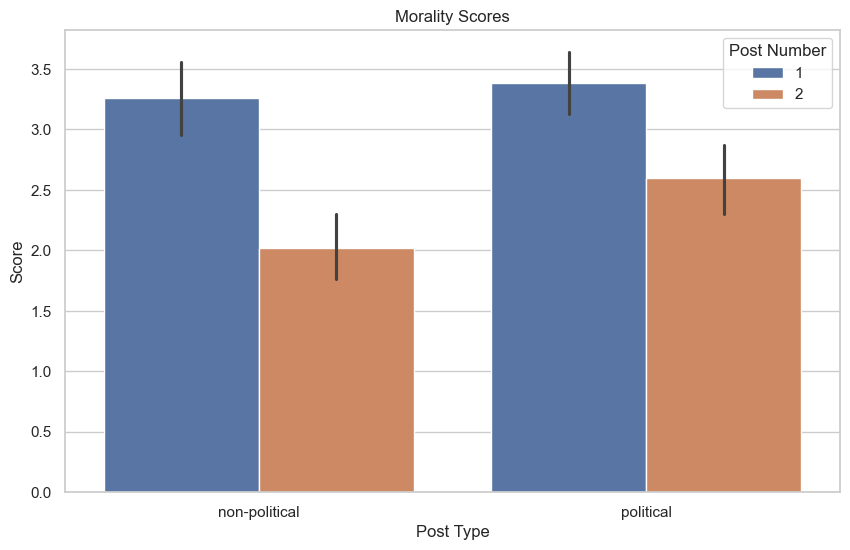

In [49]:
# Set up the plotting
sns.set(style="whitegrid")

# Morality scores
plt.figure(figsize=(10, 6))
sns.barplot(x='post_type', y='score', hue='post_number', data=melted_df[melted_df['score_category'] == 'morality'])
plt.title('Morality Scores')
plt.ylabel('Score')
plt.xlabel('Post Type')
plt.legend(title='Post Number')
plt.show()

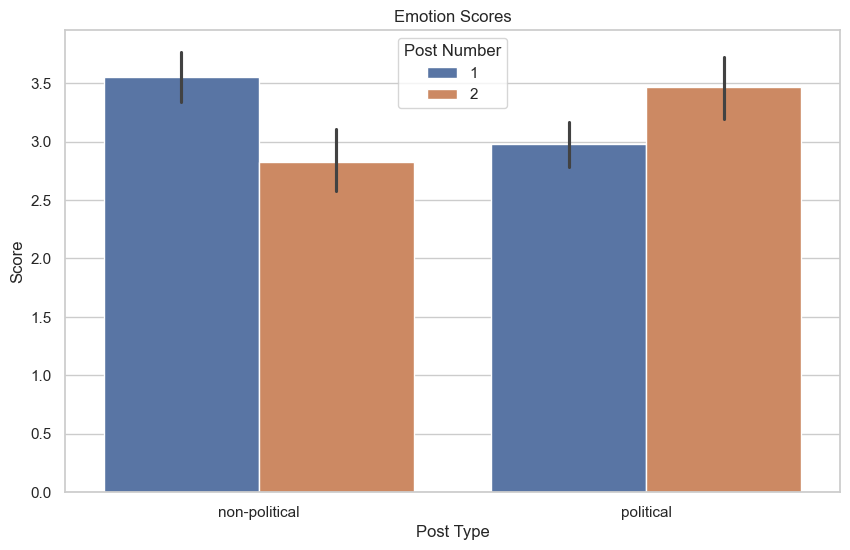

In [50]:
# Emotion scores
plt.figure(figsize=(10, 6))
sns.barplot(x='post_type', y='score', hue='post_number', data=melted_df[melted_df['score_category'] == 'emotion'])
plt.title('Emotion Scores')
plt.ylabel('Score')
plt.xlabel('Post Type')
plt.legend(title='Post Number')
plt.show()

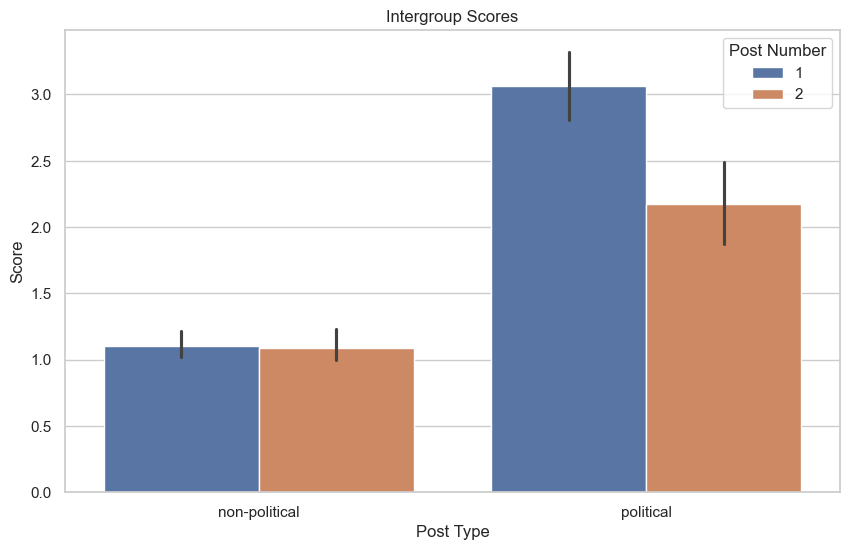

In [53]:
# Intergroup scores
plt.figure(figsize=(10, 6))
sns.barplot(x='post_type', y='score', hue='post_number', data=melted_df[melted_df['score_category'] == 'intergroup'])
plt.title('Intergroup Scores')
plt.ylabel('Score')
plt.xlabel('Post Type')
plt.legend(title='Post Number')
plt.show()

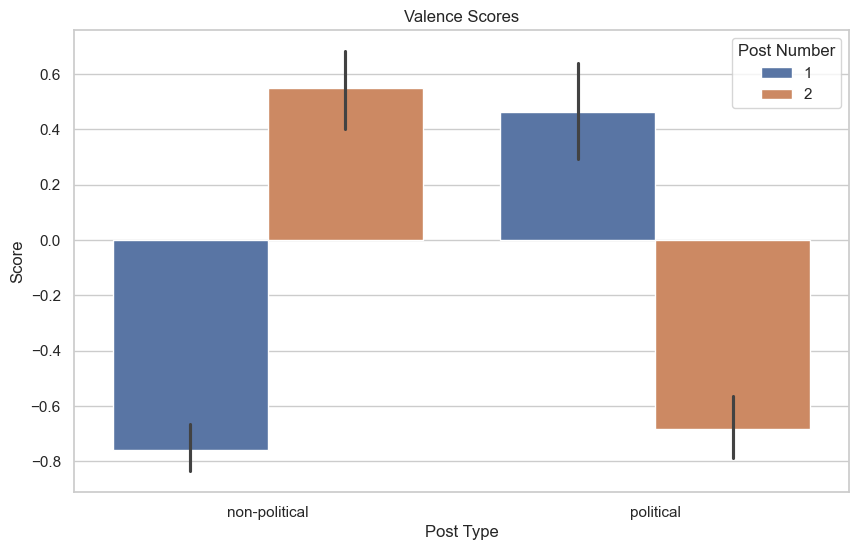

In [55]:
# Valence scores
plt.figure(figsize=(10, 6))
sns.barplot(x='post_type', y='score', hue='post_number', data=melted_df[melted_df['score_category'] == 'valence'])
plt.title('Valence Scores')
plt.ylabel('Score')
plt.xlabel('Post Type')
plt.legend(title='Post Number')
plt.show()

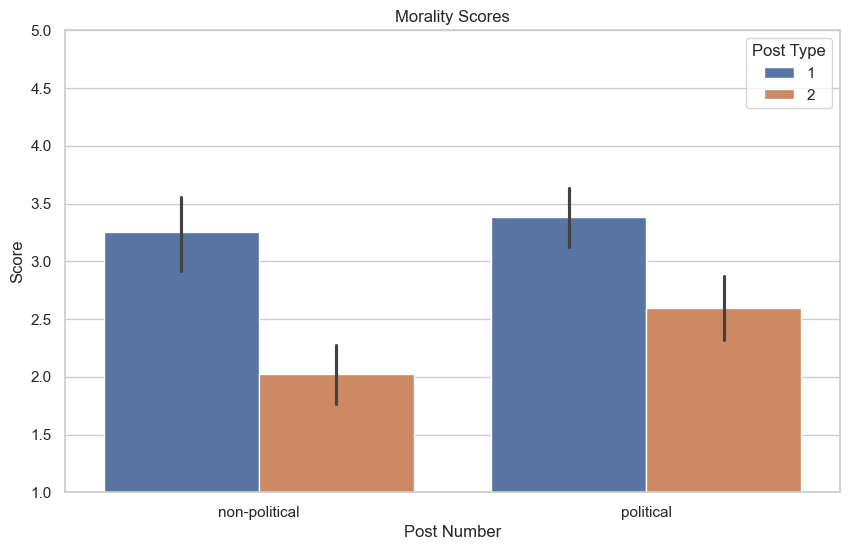

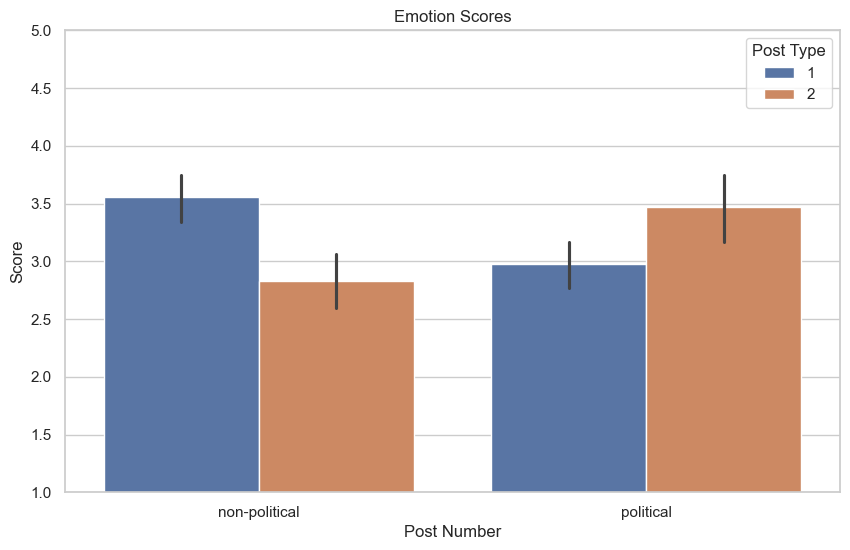

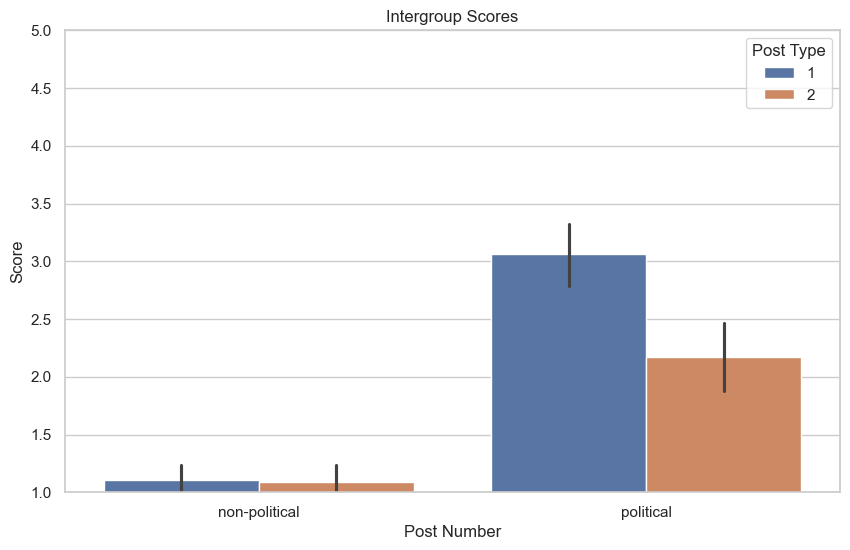

In [60]:
# Set up the plotting
sns.set(style="whitegrid")

# Function to create bar plots for each event
def plot_scores(df, score_category):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='post_type', y='score', hue='post_number', data=df[df['score_category'] == score_category])
    plt.ylim(1, 5)
    plt.title(f'{score_category.capitalize()} Scores')
    plt.ylabel('Score')
    plt.xlabel('Post Number')
    plt.legend(title='Post Type')
    plt.show()

# Plot each score category
plot_scores(melted_df, 'morality')
plot_scores(melted_df, 'emotion')
plot_scores(melted_df, 'intergroup')

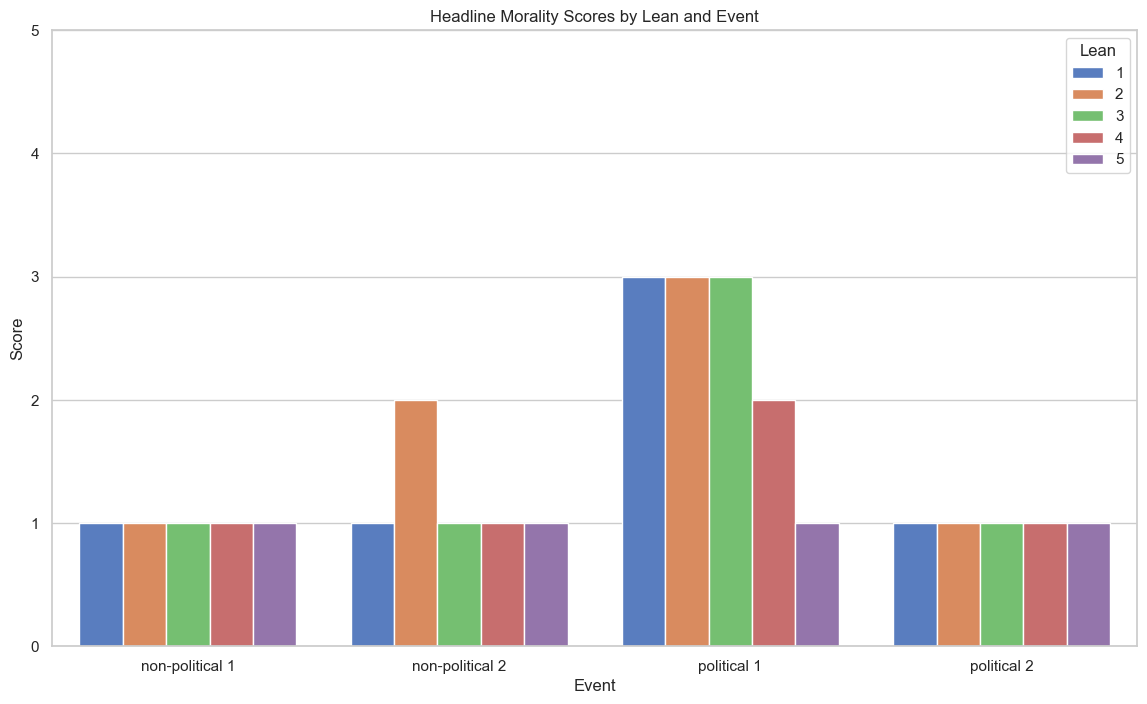

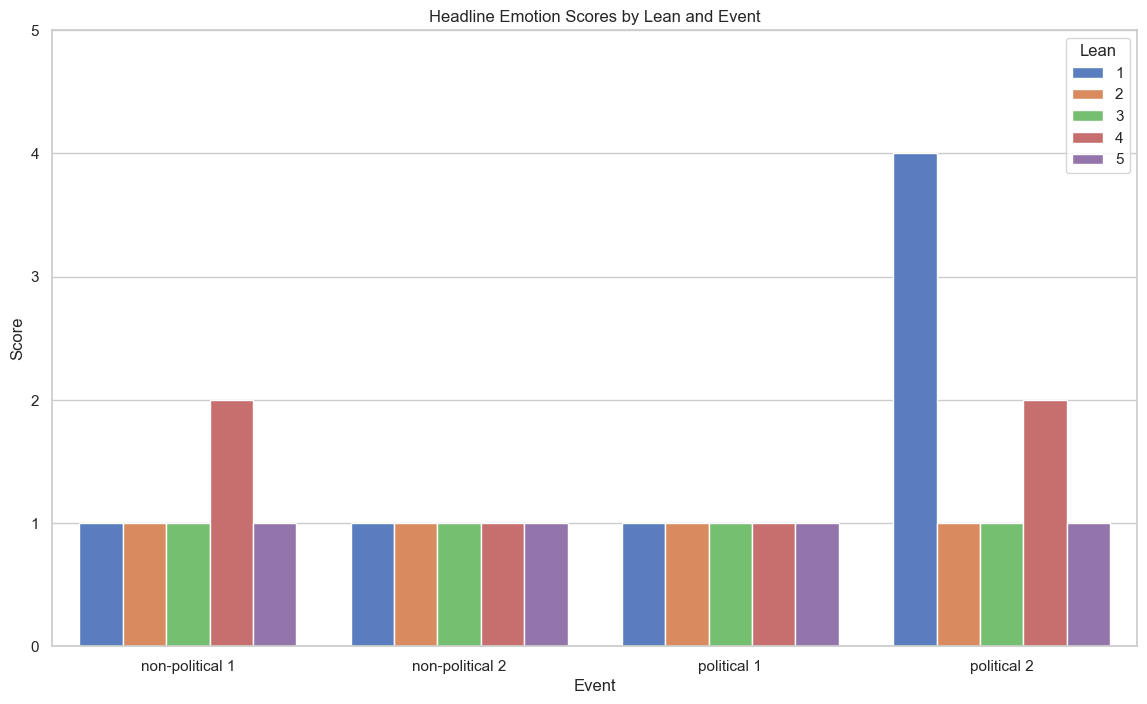

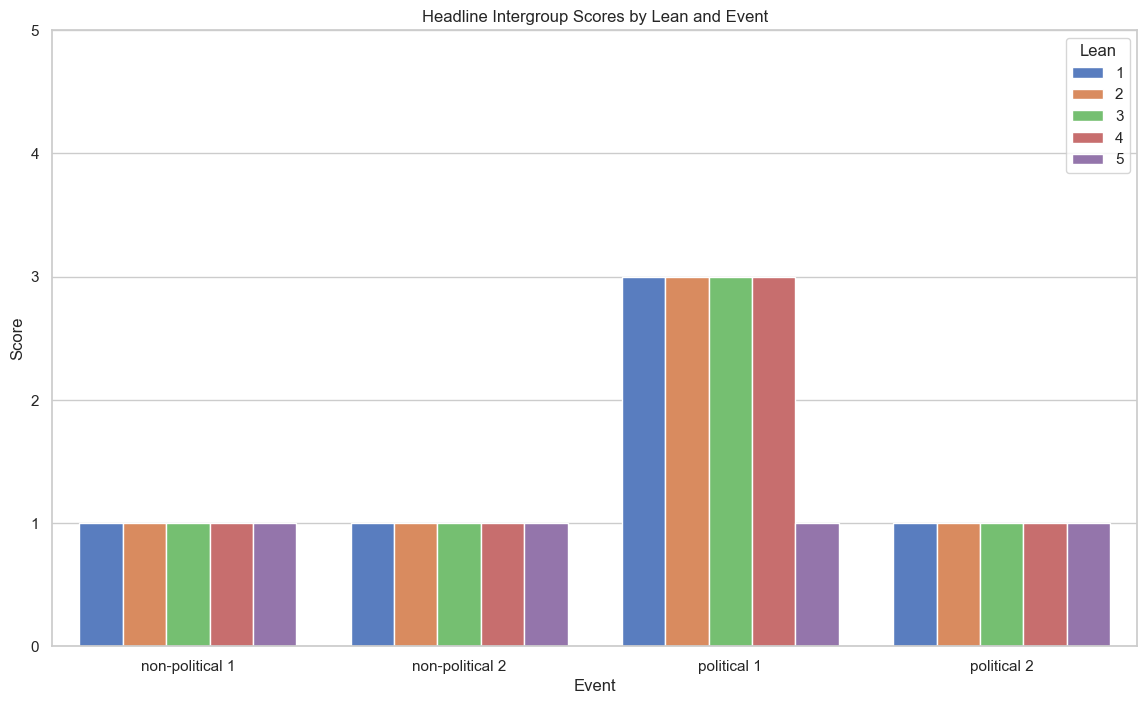

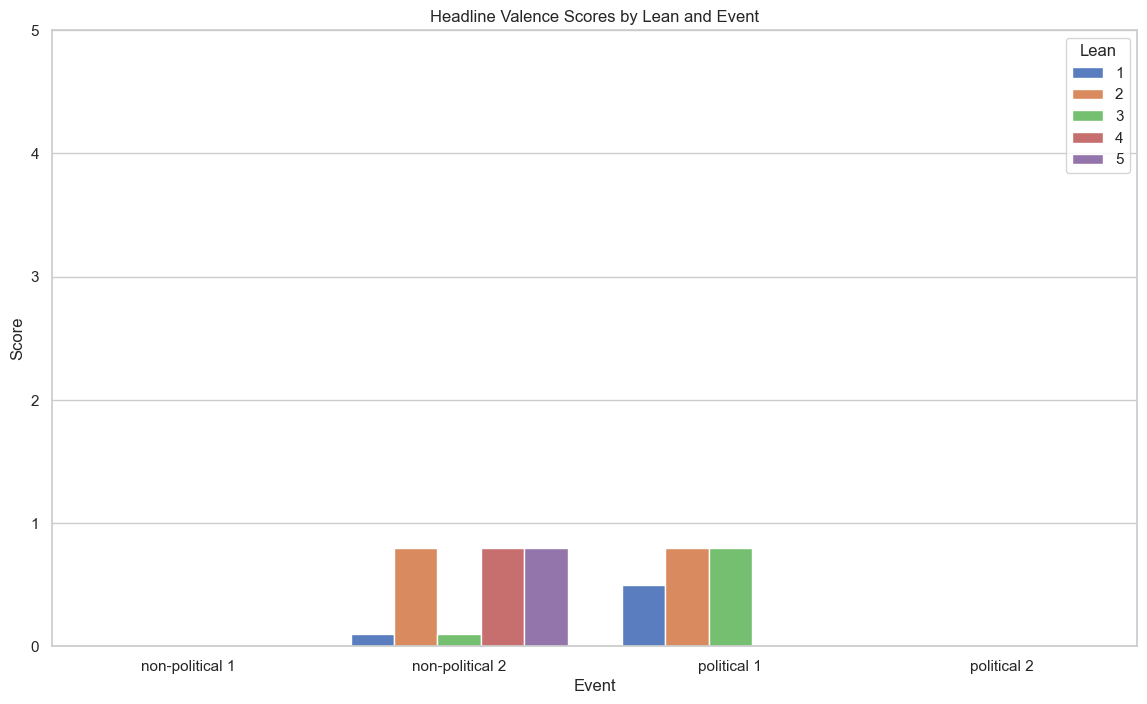

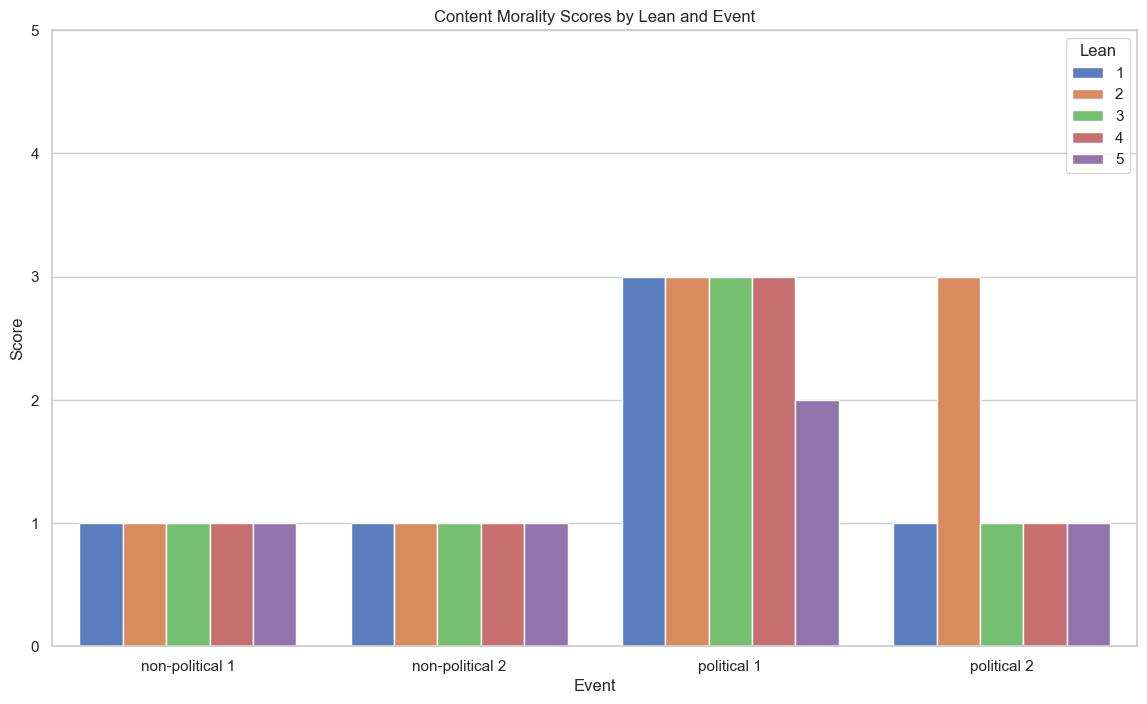

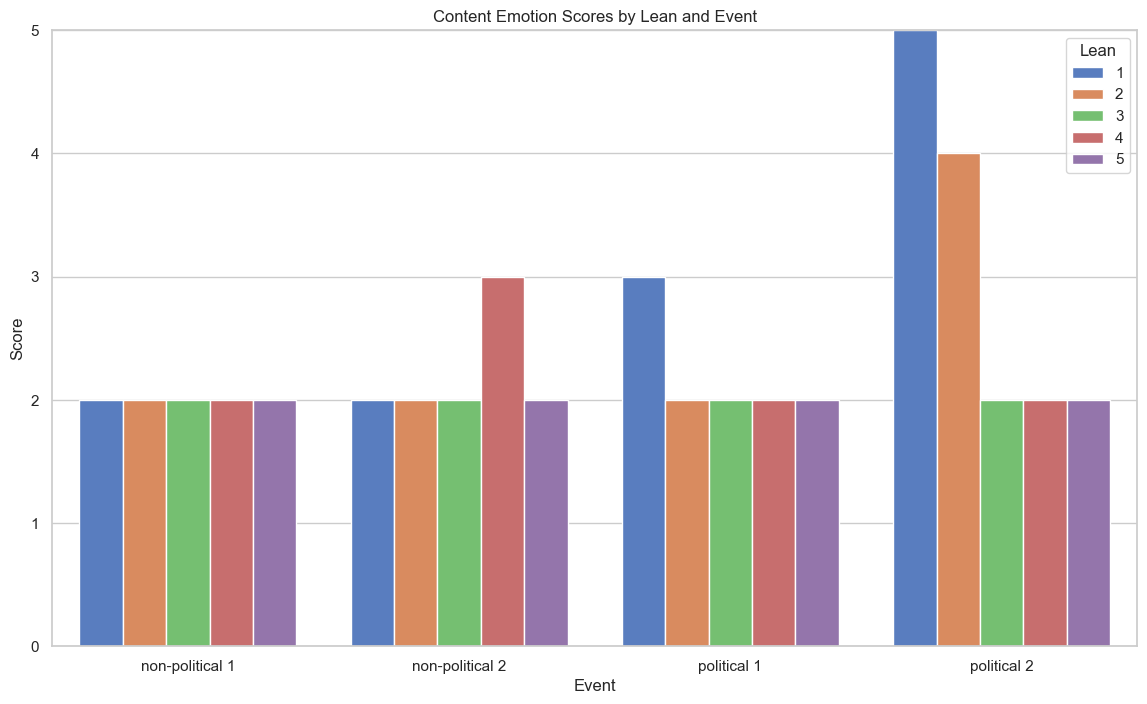

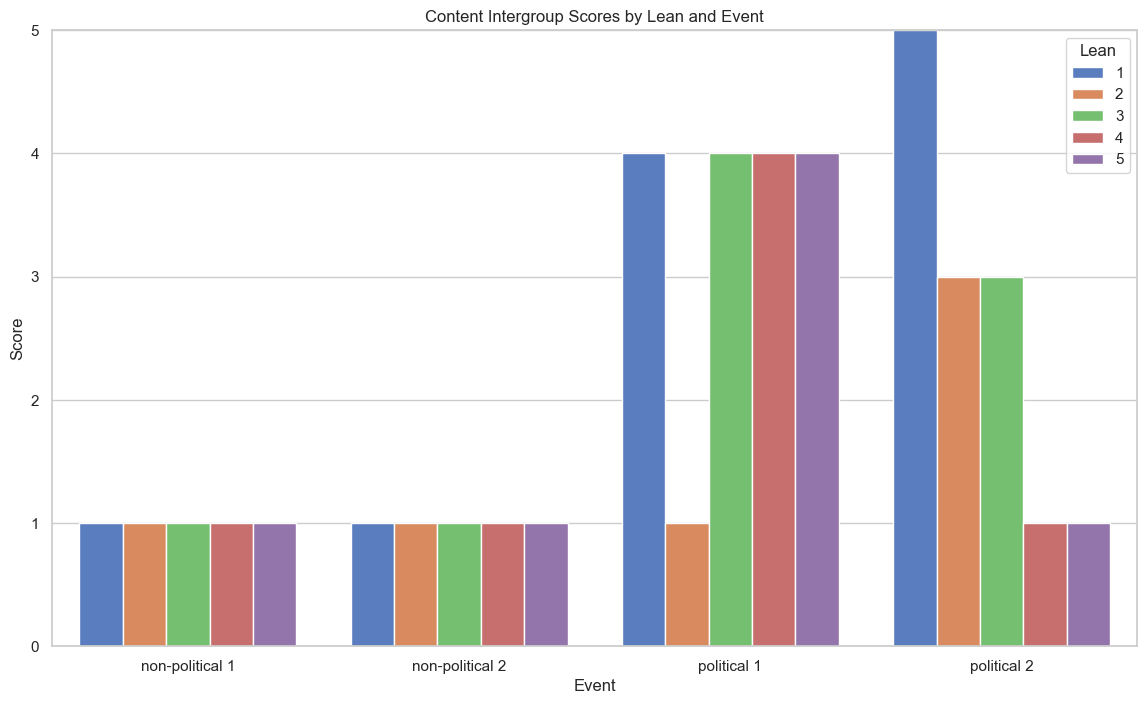

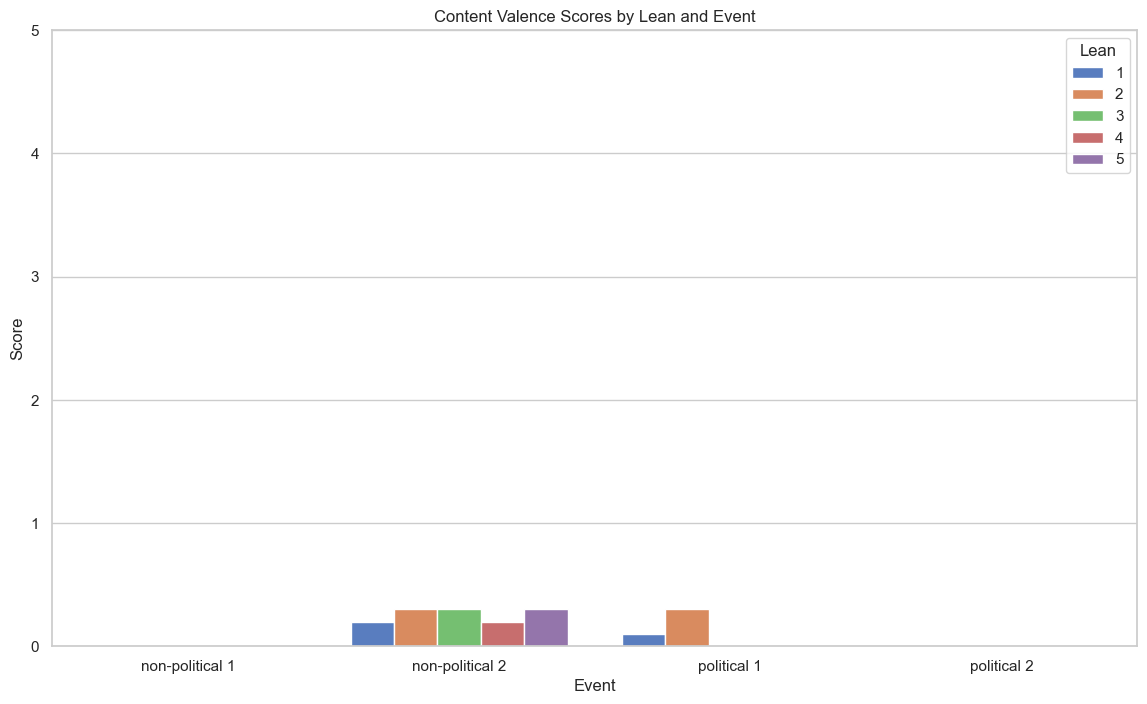

In [85]:
def plot_scores_combined(df, score_category, title):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Event ', y=score_category, hue='Lean', data=df, palette='muted')
    plt.ylim(0, 5)
    plt.title(f'{title} Scores by Lean and Event')
    plt.ylabel('Score')
    plt.xlabel('Event')
    plt.legend(title='Lean')
    plt.show()

# Plot each score category for Headline and Content separately
plot_scores_combined(news, 'Headline_morality', 'Headline Morality')
plot_scores_combined(news, 'Headline_emotion', 'Headline Emotion')
plot_scores_combined(news, 'Headline_intergroup', 'Headline Intergroup')
plot_scores_combined(news, 'Headline_valence', 'Headline Valence')

plot_scores_combined(news, 'Content_morality', 'Content Morality')
plot_scores_combined(news, 'Content_emotion', 'Content Emotion')
plot_scores_combined(news, 'Content_intergroup', 'Content Intergroup')
plot_scores_combined(news, 'Content_valence', 'Content Valence')

In [86]:
def plot_scores_combined(df, score_category, title):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Event ', y=score_category, hue='Lean', data=df, palette='muted')
    plt.ylim(-1, 1)
    plt.title(f'{title} Scores by Lean and Event')
    plt.ylabel('Score')
    plt.xlabel('Event')
    plt.legend(title='Lean')
    plt.show()


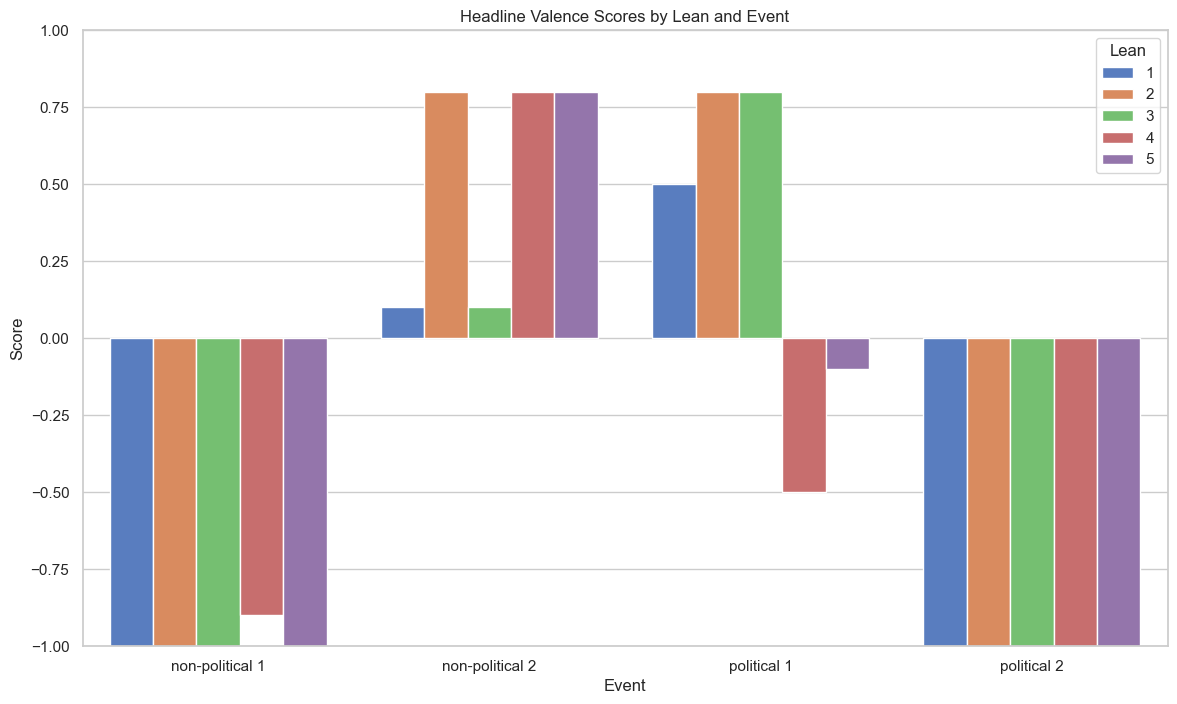

In [87]:
plot_scores_combined(news, 'Headline_valence', 'Headline Valence')


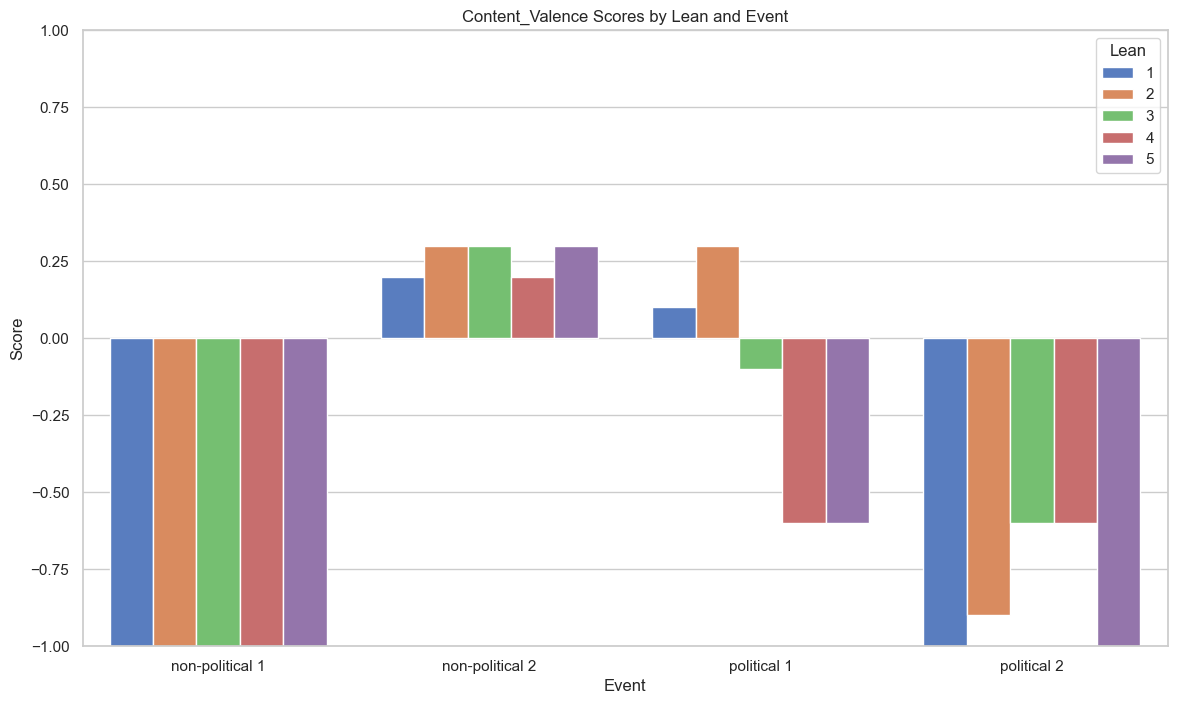

In [89]:
plot_scores_combined(news, 'Content_valence', 'Content_Valence')


In [80]:
news[news['Event ']=='non-political 1']

,Event,Lean,News_URL,Headline,Content,Headline_morality,Headline_emotion,Headline_intergroup,Headline_valence,Content_morality,Content_emotion,Content_intergroup,Content_valence
0,non-political 1,1,https://www.huffpost.com/entry/memorial-day-st...,At Least 22 Dead In Memorial Day Weekend Storm...,A series of powerful storms swept over the cen...,1,1,1,-1.0,1,2,1,-1.0
1,non-political 1,2,https://abcnews.go.com/US/2-dead-after-apparen...,"At least 20 dead across Texas, Oklahoma, Arkan...",Severe storms over the weekend led to the deat...,1,1,1,-1.0,1,2,1,-1.0
2,non-political 1,3,https://www.reuters.com/world/us/tornadoes-hit...,"At least 14 dead from storms in Texas, Arkansa...",May 26 (Reuters) - Search teams on Sunday pick...,1,1,1,-1.0,1,2,1,-1.0
3,non-political 1,4,https://www.washingtontimes.com/news/2024/may/...,Latest deadly weather in U.S. kills at least 1...,"VALLEY VIEW, Texas (AP) — Powerful storms kill...",1,2,1,-0.9,1,2,1,-1.0
4,non-political 1,5,https://www.breitbart.com/news/at-least-9-dead...,At Least 15 Dead after Severe Weather Carves P...,"VALLEY VIEW, Texas (AP) — Powerful storms kill...",1,1,1,-1.0,1,2,1,-1.0


In [90]:
survey

,index,ResponseId,non-political post 1,political post 1,non-political post 2,political post 2,age,gender,ses,social_ideology,...,non-political post 2_cleaned,non-political post 2_morality,non-political post 2_emotion,non-political post 2_intergroup,non-political post 2_valence,political post 2_cleaned,political post 2_morality,political post 2_emotion,political post 2_intergroup,political post 2_valence
0,2,R_3EKmdOsXF83qgYX,Tragedy has struck today. Tornadoes have struc...,YAY! Protections for LGBTQ is always a good th...,It's slightly worrisome that there were some d...,I'm angry and upset. Abortion is so important ...,28,Female,7,2,...,It's slightly worrisome that there were some d...,2,3,1,0.2,I'm angry and upset. Abortion is so important ...,3,5,3,-0.9
1,3,R_1DSjq8txqlJb8u0,"What a horrible tragedy, over 21 dead due to t...",I heard recently that the Biden administration...,"Wow, has anyone heard that Boeing has sent it'...","I'm not sure who has or has not heard this, bu...",32,Male,5 (middle),2,...,"Wow, has anyone heard that Boeing has sent its...",1,2,1,0.1,"I'm not sure who has or has not heard this, bu...",3,4,2,-0.6
2,4,R_6Ubcc2GcnFWkMPe,This natural disaster was an awful event and I...,"As an LGBT person, I'm glad that the Biden adm...",This is a great advancement in space explorati...,I live in Arizona and this is an awful and arc...,19,Female,7,3,...,This is a great advancement in space explorati...,3,3,1,1.0,"I live in Arizona, and this is an awful and ar...",3,4,1,-0.7
3,5,R_7inxzM7SaY3okfQ,That's horrible! I hope there wasn't too much ...,"This is a great move by the government, and mu...",Interesting.... But I was not expecting this c...,What the hell is this? Why would such an old l...,20,Male,4,1=Extremely liberal,...,Interesting... But I was not expecting this ca...,2,2,1,-0.1,What the hell is this? Why would such an old l...,2,4,1,-0.6
4,6,R_5Rj2TgEWbISipO1,Such a tragedy. I am thankful to live in a cou...,Biden continues to show his support for the LG...,The Starliner capsule finally launches after n...,Absolutely ridiculous of the Arizona Support C...,47,Female,4,1=Extremely liberal,...,The Starliner capsule finally launched after n...,1,2,1,0.8,Absolutely ridiculous for the Arizona Supreme ...,2,4,4,-1.0
5,7,R_17DjumHz1BTTNkt,Wow check out what happened in South. Multiple...,I am so glad that I am a Democrat and I voted ...,Check out this post out of the Florida space s...,I fully support a woman's right to choose. Men...,34,Male,6,1=Extremely liberal,...,Check out this post from the Florida space sta...,2,3,1,1.0,I fully support a woman's right to choose. Men...,3,4,4,-0.6
6,8,R_1c61VXgHxvOH30k,I'm am praying for those affected by the torna...,I am concern about these laws the the potentia...,"Through hard work and determination, Boeing la...",I am encouraged by this decision from the Supr...,38,Male,6,7=Extremely conservative,...,"Through hard work and determination, Boeing la...",3,3,1,1.0,I am encouraged by this decision from the Supr...,4,4,1,1.0
7,9,R_6RqnrEYmOu92XE5,Sorrow. Sorrow. Prayers. \nTo all those affect...,What a lovely win to read about today! I may ...,Pretty cool to be going into space! When do y...,Did the Arizona Supreme Court not get the memo...,32,Female,2,1=Extremely liberal,...,Pretty cool to be going into space! When do yo...,3,3,1,0.9,Did the Arizona Supreme Court not get the memo...,4,5,2,-0.9
8,10,R_37UtFkXoXfafPND,Tornadoes in the Midwest killed several dozen ...,Joe Biden and his cabinet are expanding Title ...,The Boeing Starliner capsule apparently launch...,The Arizona Supreme Court upheld a law prohibi...,34,Male,6,4=Neutral,...,The Boeing Starliner capsule apparently launch...,3,2,1,0.3,The Arizona Supreme Court upheld a law prohibi...,3,2,1,0.1
9,11,R_6QVT7KBF95MVtbr,Breaking news : Earlier today there were repor...,The Biden administration has put out shows tha...,Boeing announced their Starliner capsule launc...,Today the Arizona Supreme court upheld a 1864 ...,5

In [91]:
melted_df

,index,ResponseId,score_type,score,post_type,post_number,score_category
0,2,R_3EKmdOsXF83qgYX,non-political post 1_morality,1.0,non-political,1,morality
1,3,R_1DSjq8txqlJb8u0,non-political post 1_morality,3.0,non-political,1,morality
2,4,R_6Ubcc2GcnFWkMPe,non-political post 1_morality,4.0,non-political,1,morality
3,5,R_7inxzM7SaY3okfQ,non-political post 1_morality,2.0,non-political,1,morality
4,6,R_5Rj2TgEWbISipO1,non-political post 1_morality,4.0,non-political,1,morality
...,...,...,...,...,...,...,...
747,47,R_3lX2hKccfFUr0OJ,political post 2_valence,-1.0,political,2,valence
748,48,R_1m2ZdIkuVZINXMG,political post 2_valence,-1.0,political,2,valence
749,49,R_6I9Q3LjvC7FqQn2,political post 2_valence,-0.1,political,2,valence
750,50,R_63AUV2Z0b3IHaQ9,political post 2_valence,-0.9,political,2,valence
